In [58]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [59]:
data = yf.download("AAPL",period = "1y")
series = data["Close"]
series = series.asfreq("B")
series = series.interpolate(method = "linear")

[*********************100%***********************]  1 of 1 completed


In [66]:
print(type(series))
series.head(100)

<class 'pandas.DataFrame'>


Ticker,AAPL
Date,
2025-02-14,243.538544
2025-02-17,243.473839
2025-02-18,243.409134
2025-02-19,243.807373
2025-02-20,244.763214
...,...
2025-06-27,200.469971
2025-06-30,204.547531
2025-07-01,207.189514


In [61]:
cash = 1000
stock = 0

history = []


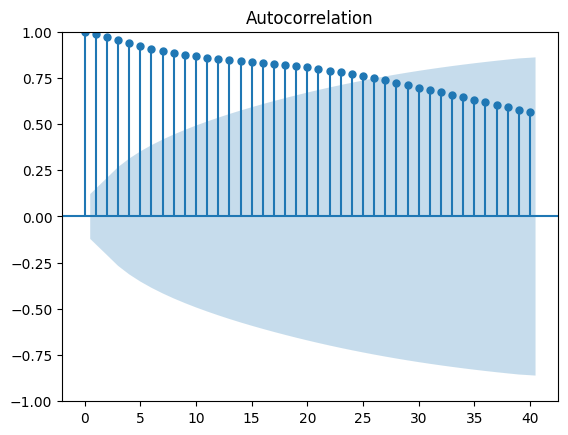

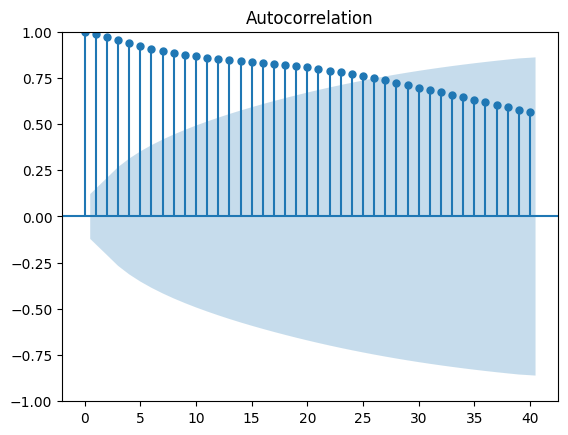

In [62]:
plot_acf(series, lags = 40)

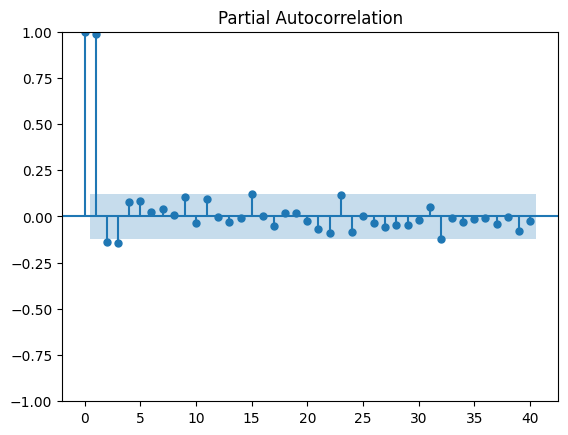

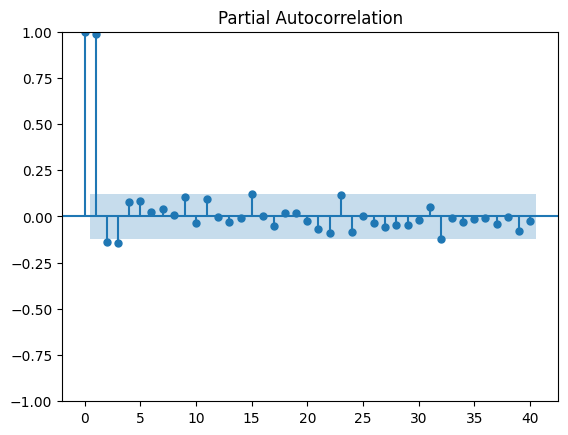

In [63]:
plot_pacf(series, lags = 40)

In [67]:
for i in range(45, len(series)-1):
    present_data = series[:i]         #I have data from day 0 to i, today is i

    model = ARIMA(present_data, order = (3,1,2))
    model_fit = model.fit()

    prediction = model_fit.forecast().item()

    today_price = series.iloc[i].item()

    print(f"@@@@@@@cash = {cash}, stock = {stock}, prediction = {prediction}, today_p = {today_price}")

    if (prediction > today_price) and (cash != 0):
        stock = cash / today_price
        cash = 0

    elif (prediction < today_price) and (stock != 0) : 
        cash = stock * today_price
        stock = 0
    
    total_value = cash + stock*today_price
    history.append(total_value)


print(f"Finally the amount of money made = {history[-1]-1000}, we started with 1000 dollars, now we at {history[-1]}")
print(f"{history}")



prediction


@@@@@@@cash = 1013.6297465939579, stock = 0, prediction = 194.392825078407, today_p = 194.22349548339844
@@@@@@@cash = 0, stock = 5.2188832461858325, prediction = 195.22097412575962, today_p = 192.32177734375
@@@@@@@cash = 0, stock = 5.2188832461858325, prediction = 192.72650219524752, today_p = 198.87322998046875


c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


@@@@@@@cash = 1037.8961680599305, stock = 0, prediction = 197.29218586932416, today_p = 203.71212768554688
@@@@@@@cash = 1037.8961680599305, stock = 0, prediction = 201.4465146976268, today_p = 207.4657745361328


c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


@@@@@@@cash = 1037.8961680599305, stock = 0, prediction = 207.72673403047932, today_p = 208.371826171875
@@@@@@@cash = 1037.8961680599305, stock = 0, prediction = 211.14400384171822, today_p = 209.2281036376953


c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


@@@@@@@cash = 0, stock = 4.960596354002127, prediction = 209.26568145070746, today_p = 210.29345703125
@@@@@@@cash = 1043.1809562197218, stock = 0, prediction = 207.8584985266247, today_p = 211.57785034179688


c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


@@@@@@@cash = 1043.1809562197218, stock = 0, prediction = 211.53730992527775, today_p = 212.39430236816406
@@@@@@@cash = 1043.1809562197218, stock = 0, prediction = 214.90216770909436, today_p = 204.45889282226562
@@@@@@@cash = 0, stock = 5.102154970224504, prediction = 204.1027305777035, today_p = 198.02691650390625
@@@@@@@cash = 0, stock = 5.102154970224504, prediction = 195.5031664863075, today_p = 197.64854431152344
@@@@@@@cash = 1008.4335027166774, stock = 0, prediction = 196.89239303179983, today_p = 195.3983612060547
@@@@@@@cash = 0, stock = 5.160910749160519, prediction = 197.24778078664775, today_p = 196.63299560546875


c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


@@@@@@@cash = 0, stock = 5.160910749160519, prediction = 196.2965168214331, today_p = 197.66848754882812
@@@@@@@cash = 1020.1494221610493, stock = 0, prediction = 196.88874429954197, today_p = 210.15049743652344
@@@@@@@cash = 1020.1494221610493, stock = 0, prediction = 211.12834185257887, today_p = 212.28399658203125
@@@@@@@cash = 1020.1494221610493, stock = 0, prediction = 214.47956817621898, today_p = 211.68580627441406
@@@@@@@cash = 0, stock = 4.819167803998166, prediction = 210.50376037414725, today_p = 210.80848693847656
@@@@@@@cash = 1015.9214730634742, stock = 0, prediction = 208.6399362637645, today_p = 210.6190643310547
@@@@@@@cash = 1015.9214730634742, stock = 0, prediction = 209.0044977317711, today_p = 208.14659118652344
@@@@@@@cash = 0, stock = 4.880798034079217, prediction = 207.28822039569707, today_p = 206.232421875
@@@@@@@cash = 0, stock = 4.880798034079217, prediction = 205.50271092220467, today_p = 201.47689819335938
@@@@@@@cash = 0, stock = 4.880798034079217, predic

c:\Users\sapta\Desktop\practice\myvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


@@@@@@@cash = 1041.9564335508892, stock = 0, prediction = 268.6022216956712, today_p = 268.4882507324219
@@@@@@@cash = 0, stock = 3.8808269289568043, prediction = 268.41612450314744, today_p = 269.1869201660156
@@@@@@@cash = 1044.6678487032189, stock = 0, prediction = 268.18501986822724, today_p = 270.8836669921875
@@@@@@@cash = 1044.6678487032189, stock = 0, prediction = 270.0819603815386, today_p = 269.85565185546875
@@@@@@@cash = 0, stock = 3.8712098172497407, prediction = 269.09705205002484, today_p = 268.53814697265625
@@@@@@@cash = 0, stock = 3.8712098172497407, prediction = 267.5702576689338, today_p = 269.5262756347656
@@@@@@@cash = 1043.3927642440642, stock = 0, prediction = 268.9582749466186, today_p = 269.6260986328125
@@@@@@@cash = 1043.3927642440642, stock = 0, prediction = 269.4798040516874, today_p = 269.25677490234375
@@@@@@@cash = 0, stock = 3.875084534539532, prediction = 269.0366888438014, today_p = 267.9592590332031
@@@@@@@cash = 0, stock = 3.875084534539532, predic

275.0946622048367